In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Setting the images path

jesus_train_path = "../dataset/train/Jesus"
jesus_test_path = "../dataset/test/Jesus"

obama_train_path = "../dataset/train/Obama"
obama_test_path = "../dataset/test/Obama"


In [3]:
def load_images(images_path):
    images = []
    for img in os.listdir(images_path):
        img_path = os.path.join(images_path,img)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (300,300), interpolation=cv2.INTER_CUBIC)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(img)
        except Exception as e:
            print(f"Cannot load image {img_path}")
    print(f"Loaded {len(images)} images from path {images_path}")
    return images

In [41]:
def crop_images(images):
    images_crop = []
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    for i in images:
        faces = face_cascade.detectMultiScale(i, scaleFactor=1.1, minNeighbors=1, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
        for (x, y, w, h) in faces:
            # cv2.rectangle(i, (x, y), (x+w, y+h), (0, 255, 0), 4)
            crop = i[y:y+h, x:x+w]
            print(i)
            images_crop.append(crop)
    return images_crop

In [42]:
jesus_prueba = np.array(crop_images(load_images(jesus_train_path)))

Cannot load image ../dataset/train/Jesus/.DS_Store
Loaded 45 images from path ../dataset/train/Jesus
[[159 158 158 ... 173 166 172]
 [159 159 159 ... 166 172 170]
 [160 160 159 ... 174 165 172]
 ...
 [101 113 116 ...  76  76  71]
 [146  97 103 ...  73  83  68]
 [111  95  95 ...  89  70  70]]
[[159 158 158 ... 173 166 172]
 [159 159 159 ... 166 172 170]
 [160 160 159 ... 174 165 172]
 ...
 [101 113 116 ...  76  76  71]
 [146  97 103 ...  73  83  68]
 [111  95  95 ...  89  70  70]]
[[206 205 202 ... 157 159 158]
 [205 211 211 ... 160 158 155]
 [209 204 205 ... 157 155 155]
 ...
 [116 114 115 ... 184 185 185]
 [117 115 116 ... 189 184 185]
 [120 111 105 ... 187 183 186]]
[[202 198 197 ... 153 162 161]
 [204 203 200 ... 159 155 155]
 [202 208 194 ... 161 155 158]
 ...
 [115 111 116 ... 186 186 187]
 [119 117 116 ... 189 191 190]
 [120 108 116 ... 191 190 191]]
[[180 189 194 ... 169 166 167]
 [196 188 193 ... 167 170 170]
 [192 187 189 ... 165 166 172]
 ...
 [ 44  34  18 ...  18  31  32]
 [

/var/folders/6m/hcgffw0n3ds8pbxh7jssnlg80000gn/T/ipykernel_5584/2045744437.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  jesus_prueba = np.array(crop_images(load_images(jesus_train_path)))


In [43]:
print(jesus_prueba.shape)

(49,)


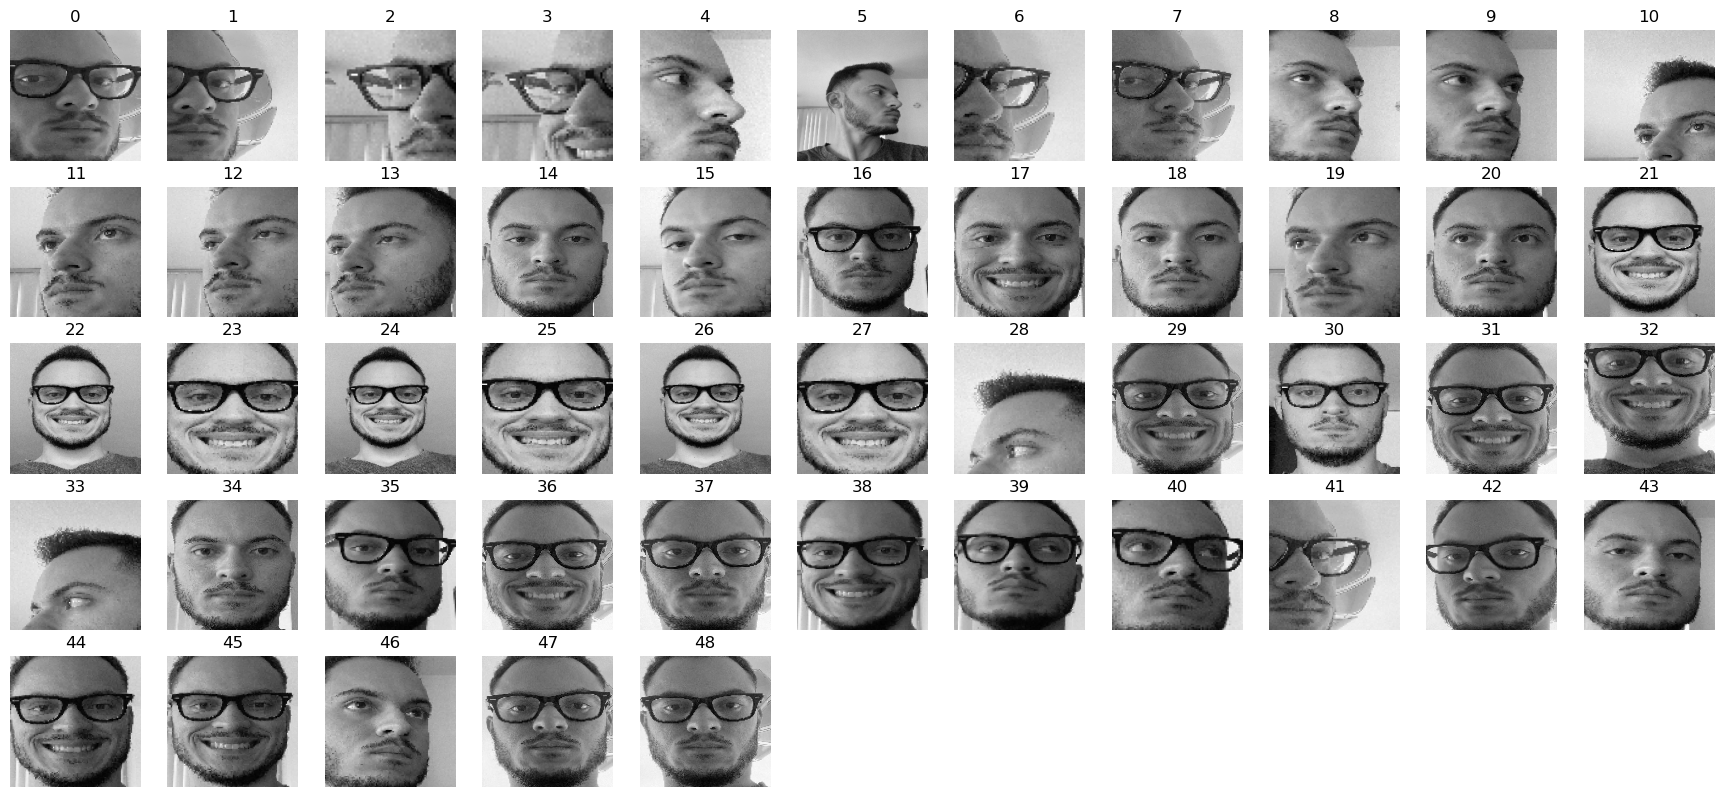

In [44]:
#plt.figure()
#plt.imshow(np.squeeze(jesus_prueba[5]), cmap="gray")
#plt.show()

plt.figure(figsize=(22,20))
for i in range(len(jesus_prueba)):
    plt.subplot(10,11,i+1)
    plt.imshow(jesus_prueba[i], cmap="gray")
    plt.axis("off")
    plt.title(i)
